# <center >Data Science with Python 
## <center >Statistical and Data Technique in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or in the folder attached customers).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [34]:
import pandas as pd
import numpy as np
import statistics as sta
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('customers.csv')

print(data.head())
print('Shape = ', data.shape)
print('Colums.tolist = ', data.columns.tolist())
print('dtype: \n ', data.dtypes)
data.iloc[:,2:] = data.iloc[:,2:].astype(np.float)
print('dtype: \n ', data.dtypes)
data = data.drop(columns=['Channel', 'Region', 'Frozen', 'Detergents_Paper', 'Delicatessen'])
print(data.head())



   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
Shape =  (440, 8)
Colums.tolist =  ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
dtype: 
  Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object
dtype: 
  Channel               int64
Region                int64
Fresh               float64
Milk          

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

Grocery: 
 count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64
Range of Grocery =  92777.0
Standard deviation of Grocery =  9503.162828994344
Skewness of Grocery =  3.5751872200807875
Kurtosis index of Grocery =  20.664153228293365


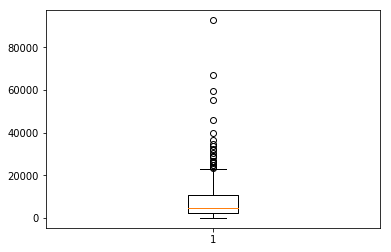

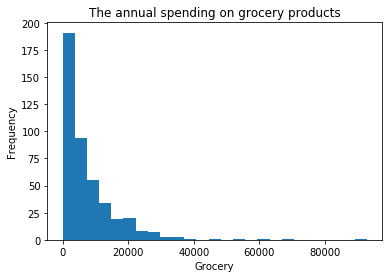

In [35]:
print('Grocery: \n', data['Grocery'].describe())

print('Range of Grocery = ', max(data['Grocery']) - min(data['Grocery']))

print('Standard deviation of Grocery = ', sta.stdev(data['Grocery']))

print('Skewness of Grocery = ', ss.skew(data['Grocery']))

print('Kurtosis index of Grocery = ', ss.kurtosis(data['Grocery']))
plt.boxplot(data['Grocery'])
plt.show()

ax = data.Grocery.plot.hist(bins=25)
ax.set(xlabel = 'Grocery', ylabel='Frequency', title='The annual spending on grocery products')
plt.show()

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

Correlation of Grocery and Milk = 
 [[1.         0.72833512]
 [0.72833512 1.        ]]


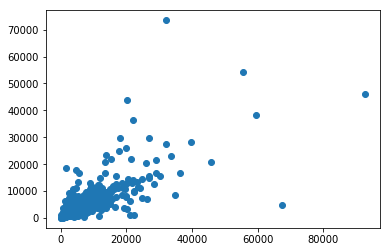

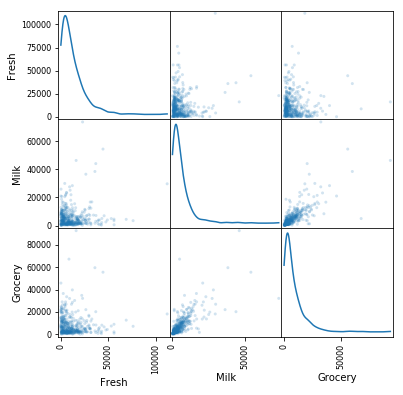

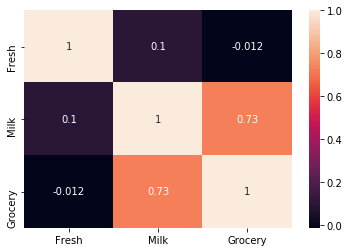

In [36]:
print('Correlation of Grocery and Milk = \n', np.corrcoef(data['Grocery'],data['Milk']))

plt.scatter(data['Grocery'],data['Milk'])
plt.show()

pd.plotting.scatter_matrix(data, alpha = 0.2, figsize = (6,6), diagonal = 'kde')
plt.show()

sns.heatmap(data.corr(), annot=True)
plt.show()

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [37]:
def c_p(product1, product2):
    c, p = ss.pearsonr(data[product1], data[product2])
    print(f'({product1}, {product2}): correlation = {c}, p-value = {p}')

c_p('Grocery','Milk')
c_p('Grocery', 'Fresh')
c_p('Fresh', 'Milk')

print('H: Grocery and Milk are corellated.')
c_GM, p_GM = ss.pearsonr(data['Grocery'], data['Milk'])
p = 0.1
if p < p_GM:
    print('Accept H')
else:
    print('Reject H')

print('H0: Grocery and Milk are non-corellated.')
p = 0.1
if p > p_GM:
    print('Accept H0')
else:
    print('Reject H0')

(Grocery, Milk): correlation = 0.7283351181536448, p-value = 6.480570788053402e-74
(Grocery, Fresh): correlation = -0.011853874984010514, p-value = 0.8041728013490431
(Fresh, Milk): correlation = 0.1005097682998585, p-value = 0.03506100703784227
H: Grocery and Milk are corellated.
Reject H
H0: Grocery and Milk are non-corellated.
Accept H0


### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

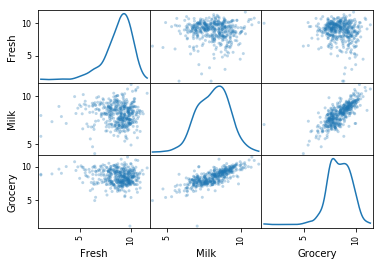

In [38]:
log_data = np.log(data)
pd.plotting.scatter_matrix(log_data, alpha = 0.3, diagonal = 'kde')
plt.show()

### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [52]:
import math

z = log_data['Fresh']
t = (np.mean(z) - 8.8)* math.sqrt(len(z))/sta.stdev(z)
print(t)

-0.9843582884849971
